In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Uber.csv')
df1 = df.copy()

In [4]:
df1.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [5]:
df1.shape

(29101, 13)

In [6]:
df1.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


* All the attributes are numerical except pickup_dt, borough, and hday

In [8]:
df1['pickup_dt'] = pd.to_datetime(df1.pickup_dt)
df1['borough'] = df1.borough.astype('category')
df1['hday'] = df1.hday.astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  category      
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(9), int64(1)
memory usage: 2.5 MB


* the memory usage is decreased by changing data types

In [9]:
df1.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169
std,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000


In [10]:
df1.describe(include='category')

,borough,hday
count,26058,29101
unique,6,2
top,Bronx,N
freq,4343,27980


In [11]:
df1.describe(include='all')

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
count,29101,26058,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101
unique,4343,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2015-01-01 01:00:00,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,7,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27980
first,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-06-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169,NaN
std,NaN,NaN,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000,NaN


# Observations
* The pickup date is from January to Fune 2015 

In [12]:
df1['start_year'] = df1.pickup_dt.dt.year
df1['start_month'] = df1.pickup_dt.dt.month_name()
df1['week_day'] = df1.pickup_dt.dt.day_name()
df1['start_day'] = df1.pickup_dt.dt.day
df1['start_hour'] = df1.pickup_dt.dt.hour


In [13]:
df1.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,week_day,start_day,start_hour
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,Thursday,1,1
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,Thursday,1,1
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,Thursday,1,1
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,Thursday,1,1
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,Thursday,1,1


In [14]:
df1.drop('pickup_dt', axis=1, inplace=True)

# is throwing error bc I already ran this to remove column

In [15]:
df1.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,week_day,start_day,start_hour
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,Thursday,1,1
1,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,Thursday,1,1
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,Thursday,1,1
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,Thursday,1,1
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,Thursday,1,1


In [16]:
df1['start_month'] = df1.start_month.astype('category')
df1['week_day'] = df1.week_day.astype('category')

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   borough      26058 non-null  category
 1   pickups      29101 non-null  int64   
 2   spd          29101 non-null  float64 
 3   vsb          29101 non-null  float64 
 4   temp         29101 non-null  float64 
 5   dewp         29101 non-null  float64 
 6   slp          29101 non-null  float64 
 7   pcp01        29101 non-null  float64 
 8   pcp06        29101 non-null  float64 
 9   pcp24        29101 non-null  float64 
 10  sd           29101 non-null  float64 
 11  hday         29101 non-null  category
 12  start_year   29101 non-null  int64   
 13  start_month  29101 non-null  category
 14  week_day     29101 non-null  category
 15  start_day    29101 non-null  int64   
 16  start_hour   29101 non-null  int64   
dtypes: category(4), float64(9), int64(4)
memory usage: 3.0 MB


In [18]:
df1.borough.value_counts(dropna=False)

Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
NaN              3043
Name: borough, dtype: int64

In [19]:
df1['borough'] = df1['borough'].cat.add_categories('Unknown')
df1['borough'].fillna('Unknown', inplace=True)



In [20]:
df1.isnull().sum()

borough        0
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
start_year     0
start_month    0
week_day       0
start_day      0
start_hour     0
dtype: int64

In [21]:
def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios": (.25, .75)}, figsize = figsize)
    sns.boxplot(feature, ax = ax_box2, color = 'red')
    sns.distplot(feature, ax = ax_hist2, bins = bins) if bins else sns.distplot(feature, ax = ax_hist2)
    ax_hist2.axvline(np.mean(feature), color = 'g', linestyle = '--')
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-')


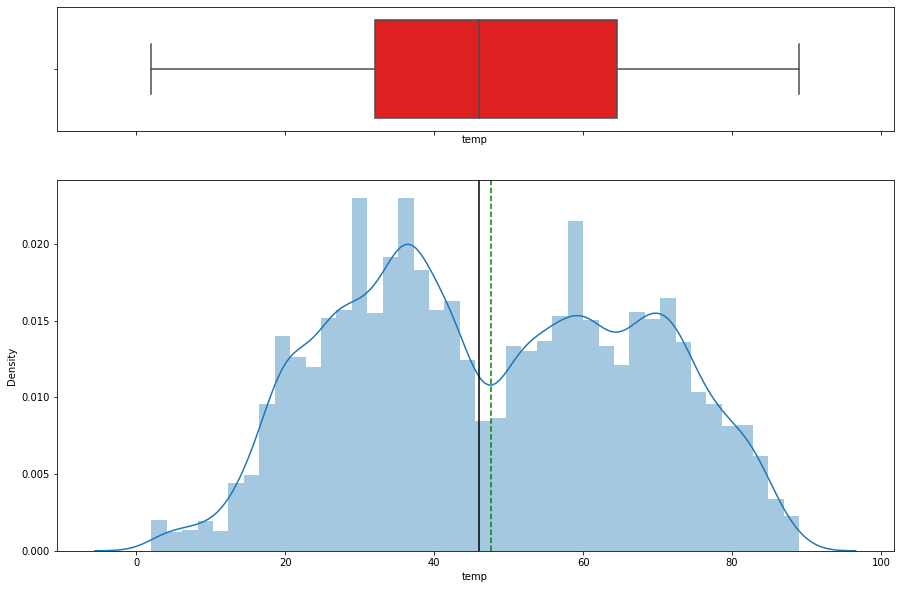

In [22]:
histogram_boxplot(df1.temp)

In [23]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

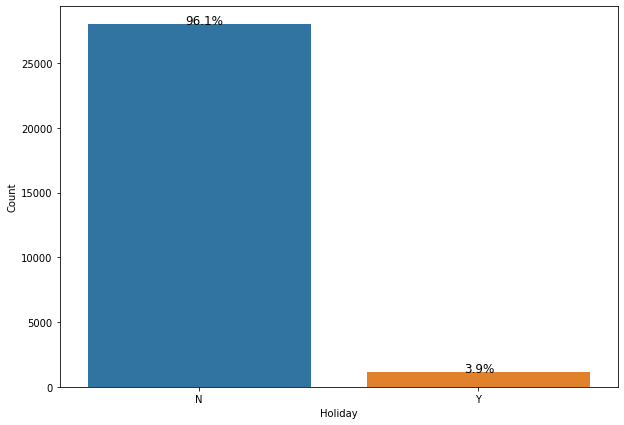

In [24]:
plt.figure(figsize = (10,7))
ax = sns.countplot(df1['hday'])
plt.xlabel('Holiday')
plt.ylabel('Count')
bar_perc(ax, df1['hday'])

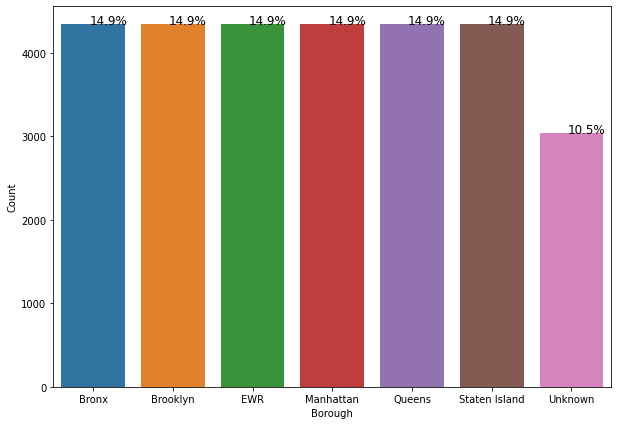

In [25]:
plt.figure(figsize = (10,7))
ax = sns.countplot(df1['borough'])
plt.xlabel('Borough')
plt.ylabel('Count')
bar_perc(ax, df1['borough'])

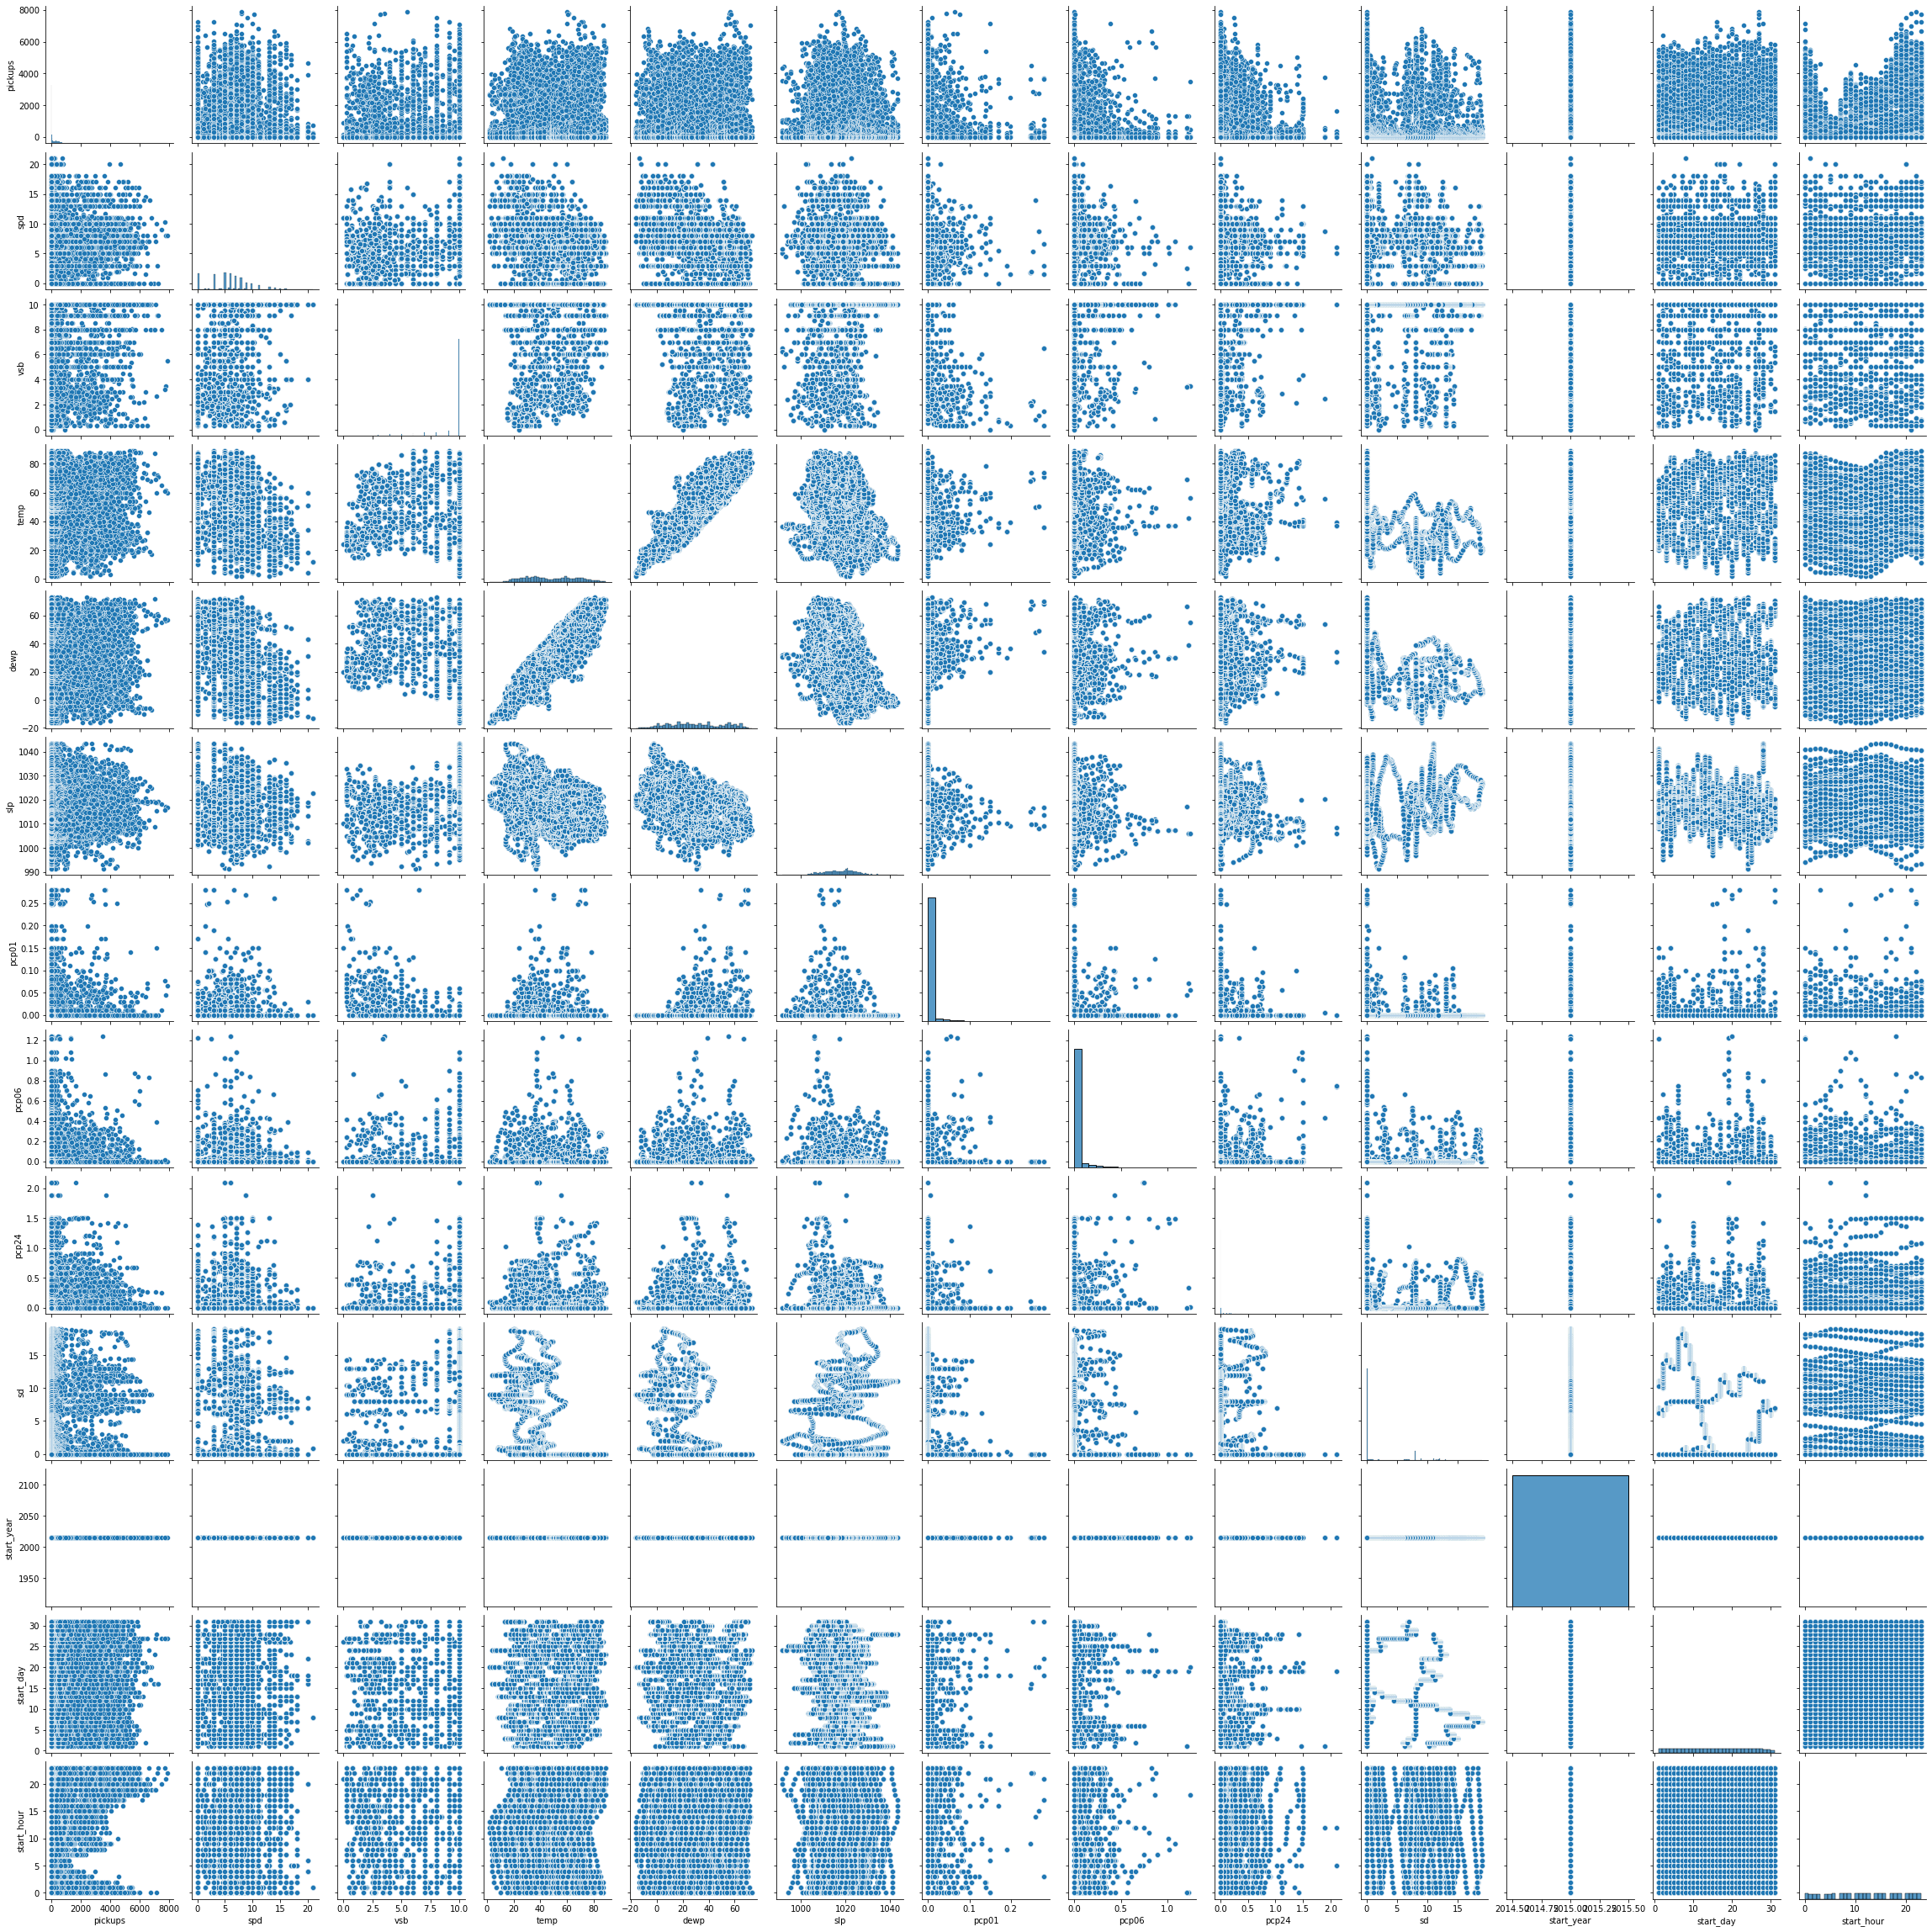

In [26]:
sns.pairplot(df1)

<AxesSubplot:>

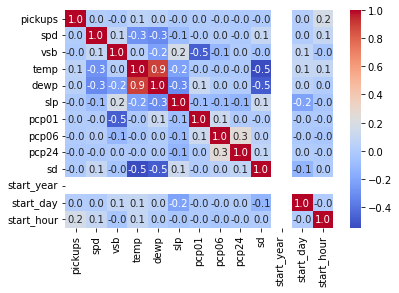

In [27]:
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm', fmt=".1f",
            xticklabels=df1.corr().columns, yticklabels=df1.corr().columns)

<AxesSubplot:xlabel='dewp', ylabel='temp'>

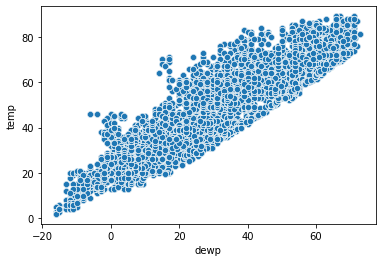

In [28]:
sns.scatterplot(df1['dewp'], df1['temp'])

Text(0.5, 0, 'Months')

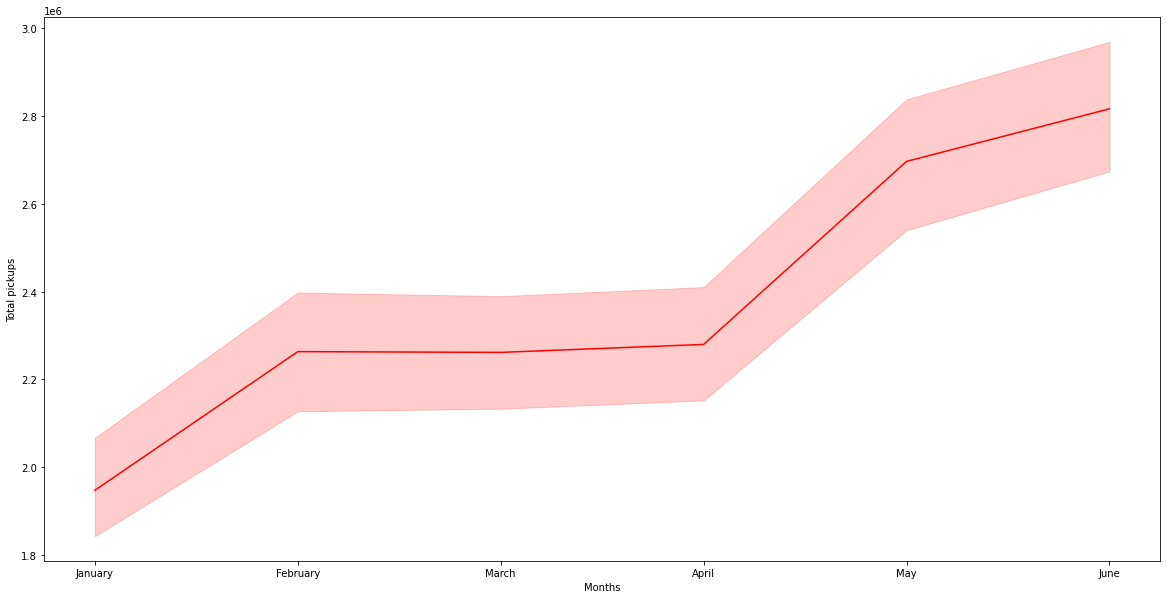

In [29]:
cats = df1.start_month.unique().tolist()
df1.start_month = pd.Categorical(df1.start_month, ordered=True, categories=cats)

plt.figure(figsize=(20, 10))
sns.lineplot(x="start_month", y="pickups", data=df1, color="red", estimator='sum') 

plt.ylabel('Total pickups')
plt.xlabel('Months')

Text(0.5, 0, 'Days')

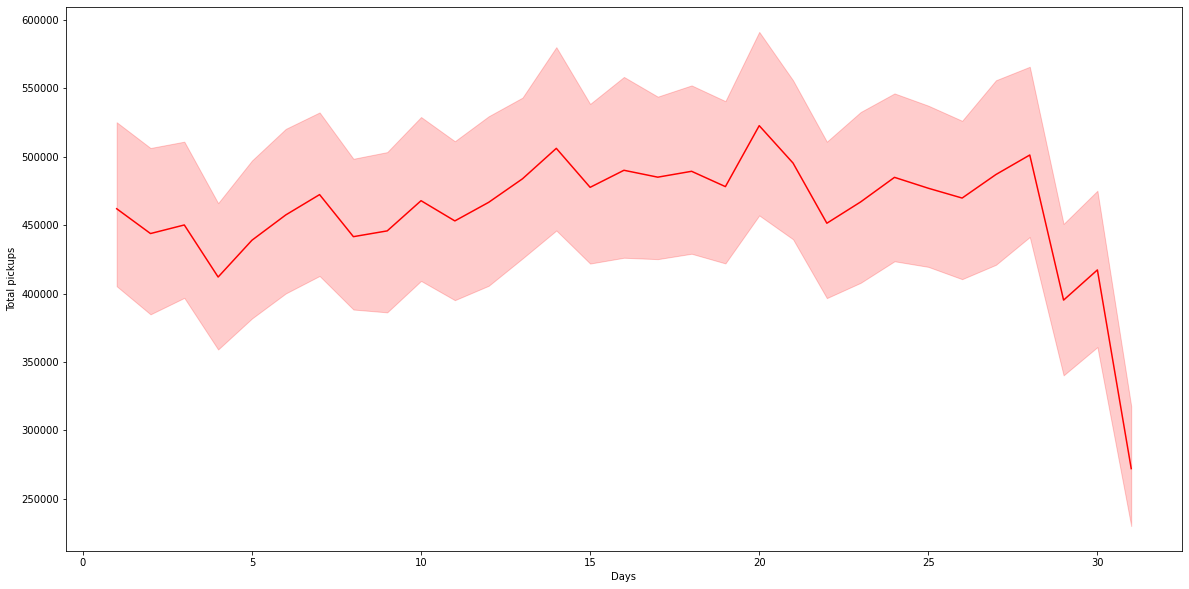

In [30]:
cats = df1.start_day.unique().tolist()
df1.start_day = pd.Categorical(df1.start_day, ordered=True, categories=cats)

plt.figure(figsize=(20, 10))
sns.lineplot(x="start_day", y="pickups", data=df1, color="red", estimator='sum') 

plt.ylabel('Total pickups')
plt.xlabel('Days')

Text(0.5, 0, 'borough')

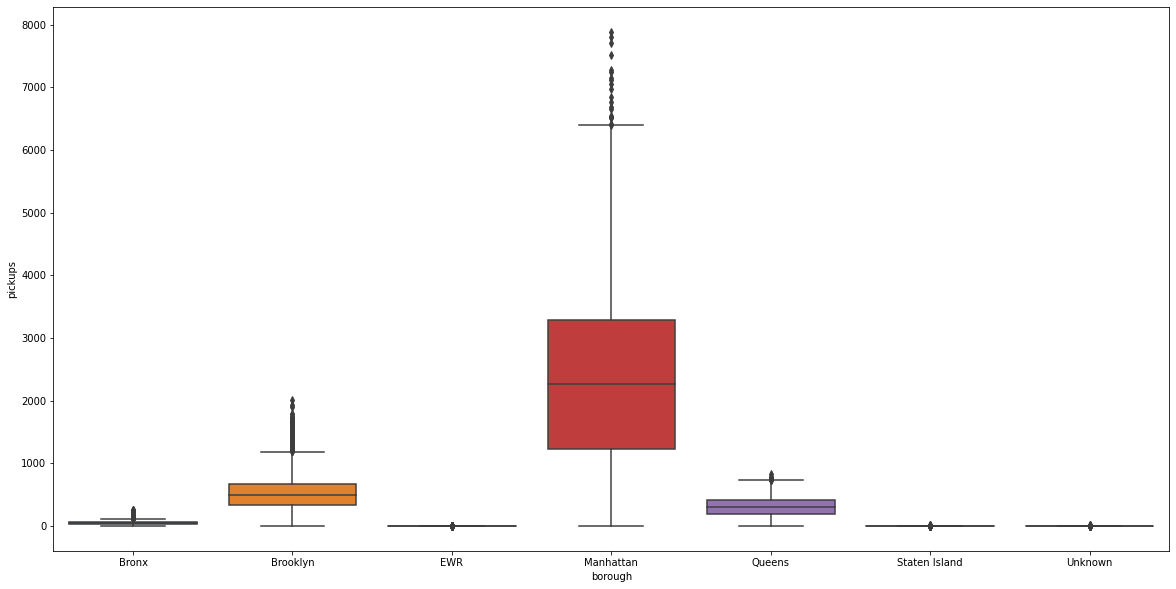

In [31]:
plt.figure(figsize=(20, 10))
sns.boxplot(df1['borough'], df1['pickups'])
plt.ylabel('pickups')
plt.xlabel('borough')

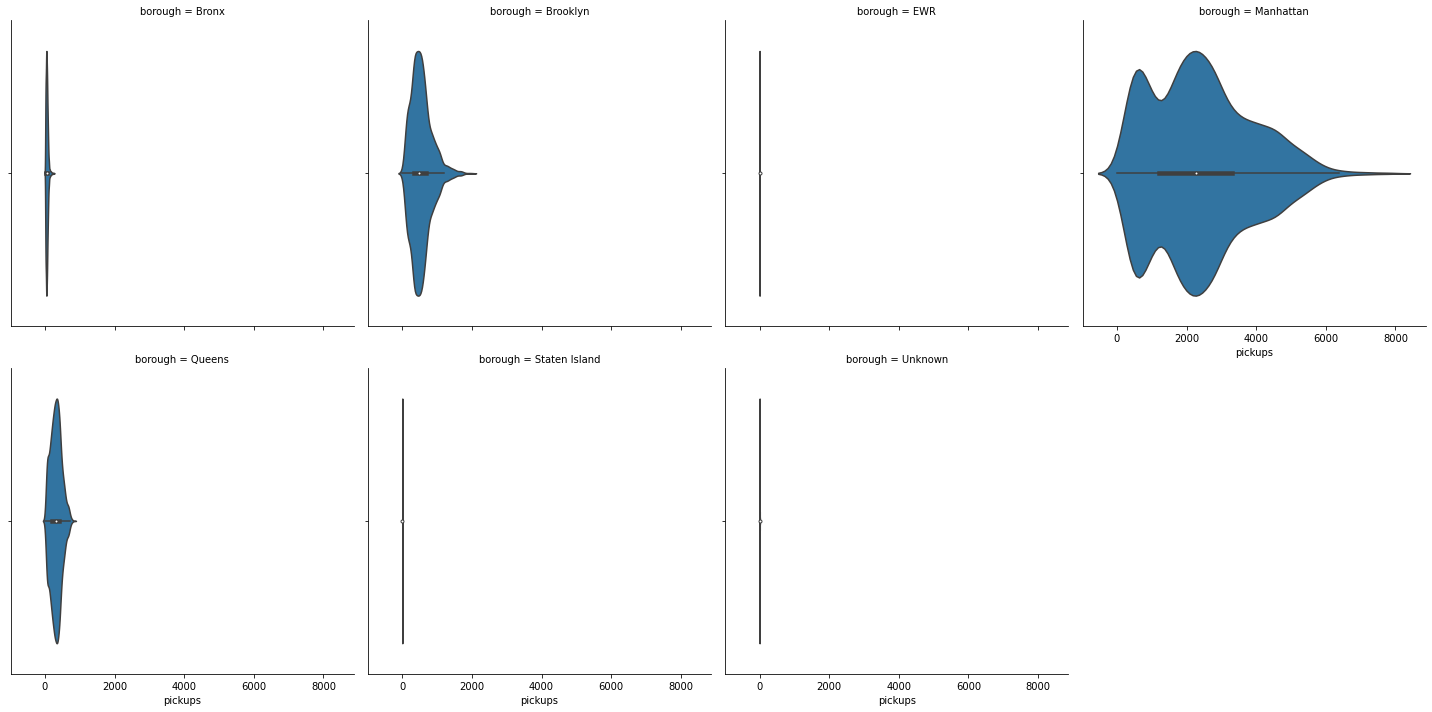

In [32]:
sns.catplot(x='pickups', col='borough', data=df1, kind='violin', col_wrap=4)

Text(0.5, 0, 'Hours of the day')

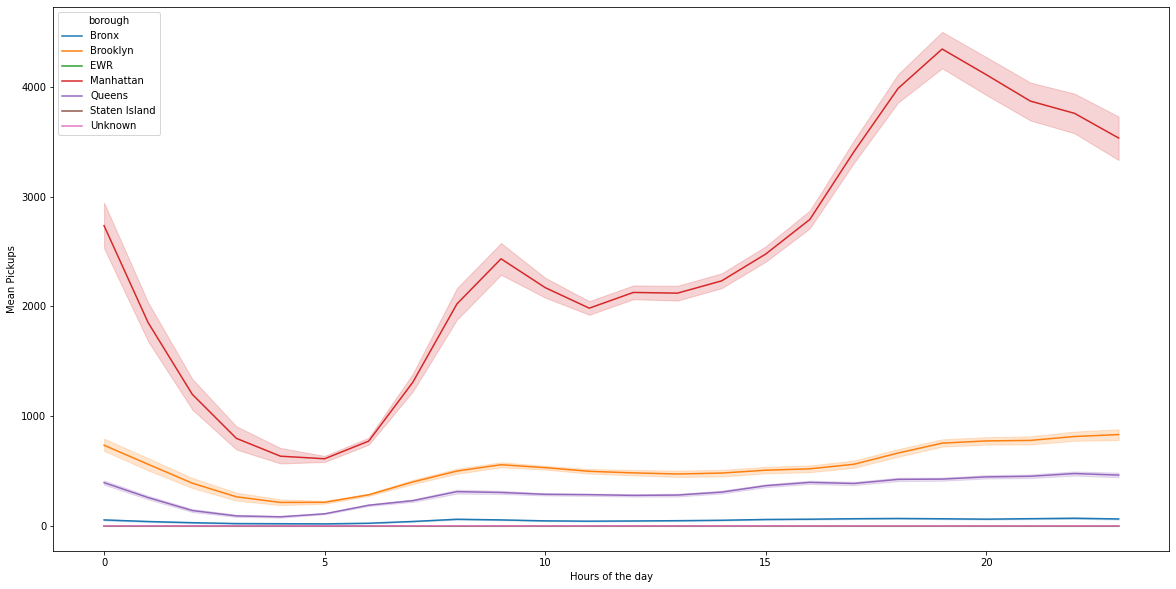

In [33]:
plt.figure(figsize=(20, 10))
sns.lineplot(x="start_hour", y="pickups", data=df1, hue='borough') 

plt.ylabel('Mean Pickups')
plt.xlabel('Hours of the day')

Text(0.5, 0, 'Hours of the day')

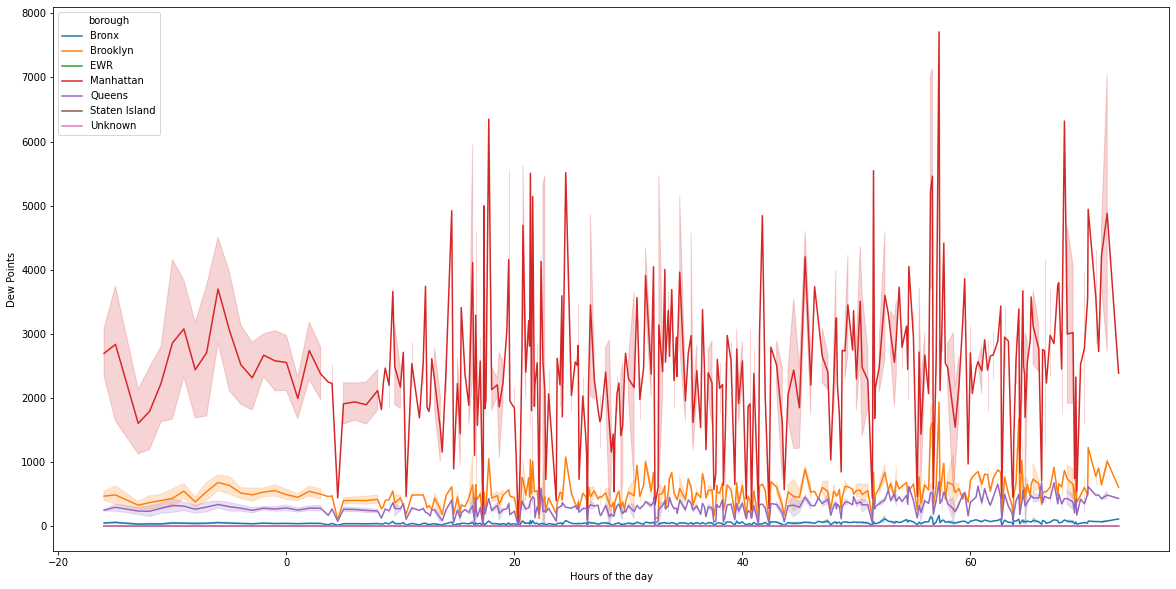

In [34]:
plt.figure(figsize=(20, 10))
sns.lineplot(x="dewp", y="pickups", data=df1, hue='borough', ci=95) 

plt.ylabel('Dew Points')
plt.xlabel('Hours of the day')